In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
import tb

# Computing band structure initializing initializing parameters from the input file `input.yaml`

Many steps related to setting input parameters may be avoided using an input file. 

## 1. Input file example

Below is an example of yaml-formatted input file `input.yaml` for the bulk silicon stored in the directory `input_samples`.

In [2]:
cat ../input_samples/input.yaml

# Parameter file for the TB_project for Si

VERBOSITY:                   1

sparse:                    true
sigma:                       -3    # should be specified if sparse is true
num_eigs:                    10    # should be specified if sparse is true

# --------------------------------------------------------

lattice_constant:           5.50
nn_distance:                2.7

xyz:
    num_atoms:               2
    title:                "Si2 cell"
    atoms:
        - Si1:       [0.0000000000,    0.0000000000,    0.0000000000]
        - Si2:       [1.3750000000,    1.3750000000,    1.3750000000]

# ---------------------------------------------------------

orbital_sets:
    Si:                'SiliconSP3D5S'
    H:                   'HydrogenS'

# ---------------------------------------------------------

primitive_cell:
    - [0, 0.5, 0.5]                # first vector
    - [0.5, 0, 0.5]                # second vector
    - [0.5, 0.5, 0]                # third vector

# Tight-b

## 2. Parsing input file

First, the yaml-file has to be transformed to the python dictionary:

In [3]:
params = tb.yaml_parser("../input_samples/input.yaml")

Next, the resulted dictionary has to be passed into the function `initializer()` from the module `tb`. This function parse all parameters, creates and returns the object of the class `Hamiltonan()`:

In [4]:
h = tb.initializer(**params)

The verbosity level is 2
The radius of the neighbourhood is 2.7 Ang

---------------------------------

The xyz-file:
 2
Si2 cell
Si1    0.0    0.0    0.0
Si2    1.375    1.375    1.375

---------------------------------

Basis set 
 Num of species {'Si': 2} 


 Si 
n | s | energy  | m  | title  | l
--+---+---------+----+--------+--
0 | 0 | -2.0196 | 0  | s      | 0
1 | 0 | 19.6748 | 0  | c      | 0
0 | 0 | 4.5448  | -1 | px     | 1
0 | 0 | 4.5448  | 1  | py     | 1
0 | 0 | 4.5448  | 0  | pz     | 1
0 | 0 | 14.1836 | -1 | dz2    | 2
0 | 0 | 14.1836 | -2 | dxz    | 2
0 | 0 | 14.1836 | 2  | dyz    | 2
0 | 0 | 14.1836 | 1  | dxy    | 2
0 | 0 | 14.1836 | 0  | dx2my2 | 2
--+---+---------+----+--------+--
 
---------------------------------

Unique distances: 
    2.3816 Ang between atoms Si and Si
---------------------------------

Primitive_cell_vectors: 
 [[0.   2.75 2.75]
 [2.75 0.   2.75]
 [2.75 2.75 0.  ]] 

Virtual and interfacial atoms: 
 Label              Coordinates     
0_Si1    

The Hamiltonan matrix has been already computed inside the function `initializer()`, so there is no need to invoke the member function h.initialize()


## 3. Setting periodic boundary conditions, defining wave vectors and diagonalizing Hamiltonian matrices for each wave vector in a loop


Primitive_cell_vectors: 
 [[0.   2.75 2.75]
 [2.75 0.   2.75]
 [2.75 2.75 0.  ]] 

Virtual and interfacial atoms: 
 Label              Coordinates     
0_Si1              [0. 0. 0.]      
*_0_0_Si1          [0.   2.75 2.75] 
**_1_0_Si1         [0.  5.5 5.5]   
**_2_0_Si1         [2.75 2.75 5.5 ] 
**_3_0_Si1         [-2.75  2.75  0.  ] 
**_4_0_Si1         [2.75 5.5  2.75] 
**_5_0_Si1         [-2.75  0.    2.75] 
*_6_0_Si1          [2.75 0.   2.75] 
**_7_0_Si1         [ 2.75 -2.75  0.  ] 
**_8_0_Si1         [5.5 0.  5.5]   
**_9_0_Si1         [5.5  2.75 2.75] 
**_10_0_Si1        [ 0.   -2.75  2.75] 
*_11_0_Si1         [2.75 2.75 0.  ] 
**_12_0_Si1        [ 2.75  0.   -2.75] 
**_13_0_Si1        [ 0.    2.75 -2.75] 
**_14_0_Si1        [5.5 5.5 0. ]   
*_15_0_Si1         [ 0.   -2.75 -2.75] 
**_16_0_Si1        [ 0.  -5.5 -5.5] 
**_17_0_Si1        [-2.75 -2.75 -5.5 ] 
**_18_0_Si1        [-2.75 -5.5  -2.75] 
*_19_0_Si1         [-2.75  0.   -2.75] 
**_20_0_Si1        [-5.5  0.  -5.5] 
**_21_0_

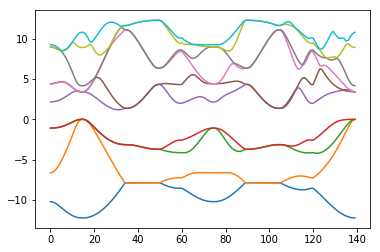

In [5]:
h.set_periodic_bc(primitive_cell=params['primitive_cell'])

sym_points = ['L', 'GAMMA', 'X', 'W', 'K', 'L', 'W', 'X', 'K', 'GAMMA']
num_points = [15, 20, 15, 10, 15, 15, 15, 15, 20]
kk = tb.get_k_coords(sym_points, num_points, 'Si')

band_sructure = []
num_of_bands = 10

for j, jj in enumerate(kk):
    vals, _ = h.diagonalize_periodic_bc(list(jj))
    vals = np.sort(np.real(vals))[:num_of_bands]
    band_sructure.append(vals)
#     print('#{} '.format(j), len(vals) * '{:2f} '.format(*np.real(vals)))

band_sructure = np.array(band_sructure)

ax = plt.axes()
ax.plot(np.sort(np.real(band_sructure)))
plt.show()